In [125]:
import numpy as np
import matplotlib.pyplot as plt 


In [148]:
A = 0.5 # Amplitude
Phi = np.random.uniform(0,2*np.pi) # phase generated randomly from (0,2pi) interval
n = np.arange(200)
Phi

1.5110922711168648

<StemContainer object of 3 artists>

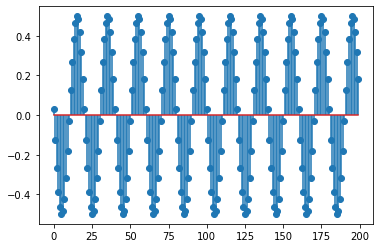

In [149]:
y = A*np.cos(2*np.pi*0.05*n + Phi) # y is harmonic random process
plt.stem(n,y)


<StemContainer object of 3 artists>

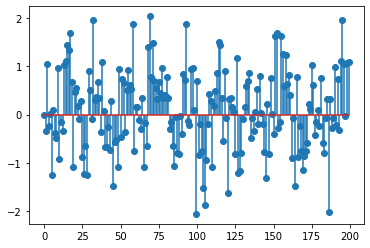

In [150]:
v = np.random.normal(0,np.sqrt(0.5),len(n)) # v is white guassian noise with zero mean and variance = 0.5
x = y + v # x is noise corrupted signal 
plt.stem(n, x )

In [151]:
##### correlation matix 
def dot_product(signal,lag) :
    length = len(signal)
    product = np.dot(signal[lag:],signal[:length - lag])/(length - lag)
    return (product)
def auto_corr(signal,length) :
    auto_correlation_matrix = np.zeros([length,length])
    for i in range(length) :
        for j in range(length) :
            auto_correlation_matrix[i][j] = dot_product(signal,abs(i - j))
    return auto_correlation_matrix        
    




In [152]:
### cross correlation vector 
def cross_corr(signal ,desired,length) :
    output = np.zeros([length,1])
    Length = len(signal)
    for i in range(length) :
        signal_shift = signal[:Length - i]
        desired_required = desired[i:]
        output[i] = np.dot(signal_shift,desired_required)/(Length-i)
    return output



In [153]:
### output from filter (convolution)
def out_from_filt(signal,weights) :
    output = np.zeros([len(signal),])
    weights_flip = weights[::-1]
    for i in range(len(signal)) :
        if i < len(weights) :
            out = 0
            for j in range(i+1) :
                out += signal[j]*weights_flip[len(weights)-j-1]
            output[i] = out 
        else :
            output[i] = np.dot(signal[i- len(weights):i],weights_flip)
                
    return output        
            
                

In [154]:
## calculation of mse 
def MSE(output,desired) :
    difference = output - desired
    mse = (np.transpose(difference)@difference)/len(difference)
    return mse

In [155]:
def weiner_filter(x,y,order_of_filter) :
    R = auto_corr(x,order_of_filter)# auto correlation matrix
    print("the order of the weiner filter is M = ",order_of_filter)
    
    P = cross_corr(x,y,order_of_filter)# cross correlation vector between x and y
    
    W = np.linalg.inv(R)@P # optimum filter weights W
    
    n = np.arange(len(y))
    y_hat = out_from_filt(x,W)
    error = MSE(y_hat,y)
    plt.figure()
    plt.title("harmonic random process y(n)")
    plt.xlabel('time')
    plt.ylabel('Amplitude')
    plt.stem(n,y)
    plt.figure()
    plt.title("corrupted_signal x(n)")
    plt.xlabel('time')
    plt.ylabel('Amplitude')
    plt.stem(n,x)
    plt.figure()
    plt.title("filtered_signal y_hat(n)")
    plt.xlabel('time')
    plt.ylabel('Amplitude')
    plt.stem(n,y_hat)
    print('MSE of recovered_signal with desired_signal is MSE =',error)
    
    return y_hat
    

the order of the weiner filter is M =  10
MSE of recovered_signal with desired_signal is MSE = 0.05558920755209506


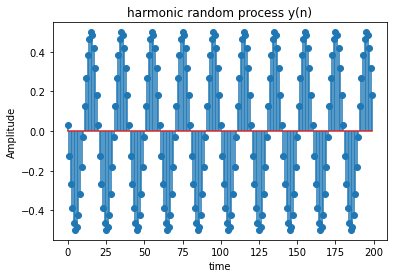

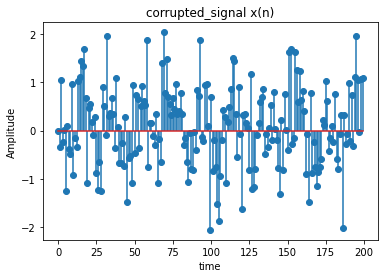

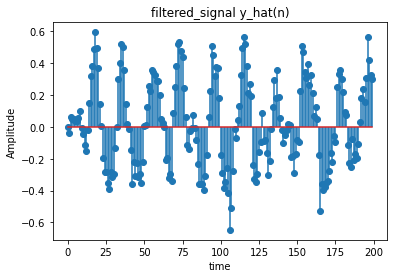

In [156]:
output10 = weiner_filter(x,y,10)## weiner filter of order 10

the order of the weiner filter is M =  15
MSE of recovered_signal with desired_signal is MSE = 0.04818534746110764


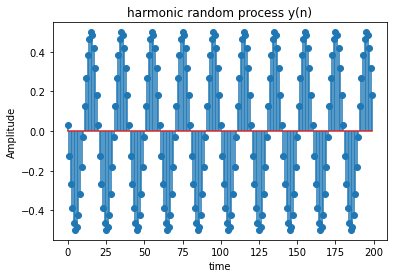

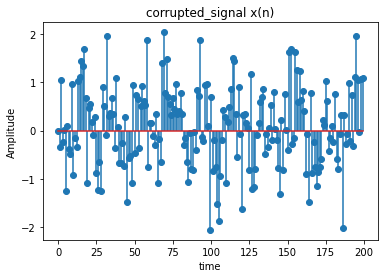

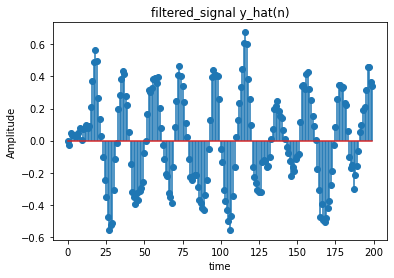

In [157]:
output15 = weiner_filter(x,y,15) # weiner filter of order 15

the order of the weiner filter is M =  20
MSE of recovered_signal with desired_signal is MSE = 0.0403446983023939


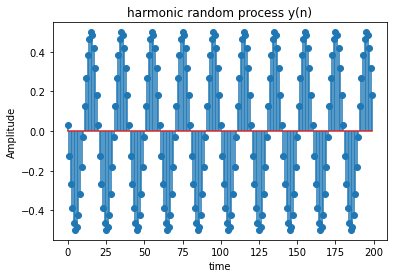

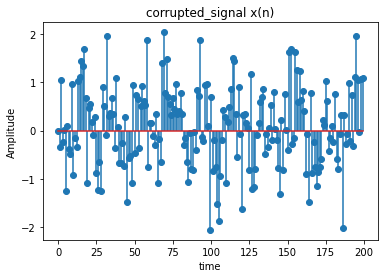

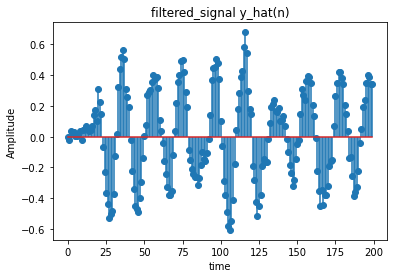

In [158]:
output20 = weiner_filter(x,y,20) # weiner filter of order 20